In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('supermarket_sales - Sheet1.csv')
df=pd.DataFrame(data)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

(None,
         Unit price     Quantity       Tax 5%        Total  \
 count  1000.000000  1000.000000  1000.000000  1000.000000   
 mean     55.672130     5.510000    15.379369   322.966749   
 min      10.080000     1.000000     0.508500    10.678500   
 25%      32.875000     3.000000     5.924875   124.422375   
 50%      55.230000     5.000000    12.088000   253.848000   
 75%      77.935000     8.000000    22.445250   471.350250   
 max      99.960000    10.000000    49.650000  1042.650000   
 std      26.494628     2.923431    11.708825   245.885335   
 
                              Date        cogs  gross margin percentage  \
 count                        1000  1000.00000              1000.000000   
 mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
 min           2019-01-01 00:00:00    10.17000                 4.761905   
 25%           2019-01-24 00:00:00   118.49750                 4.761905   
 50%           2019-02-13 00:00:00   241.76000            

# **Exploratory Data Analysis (EDA)**

### 1.What are the total sales for each branch?

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


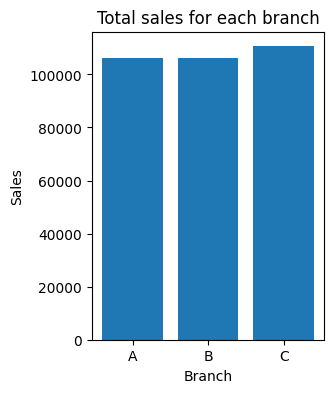

In [5]:
total_sale_brance=df.groupby('Branch')['Total'].sum()
print(total_sale_brance)
plt.figure(figsize=(3,4))
plt.bar(total_sale_brance.index,total_sale_brance.values)
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.title('Total sales for each branch')
plt.show()

##### *Branch-wise Sales: The total sales vary across branches, with branch C clearly outperforming others.*

### 2.Which product line generates the highest revenue?

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


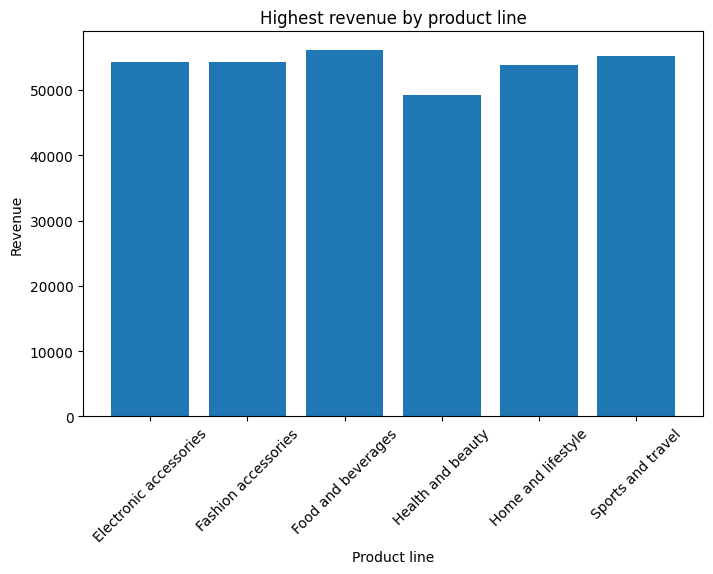

In [6]:
highest_revenue=df.groupby('Product line')['Total'].sum()
print(highest_revenue)
plt.figure(figsize=(8,5))
plt.bar(highest_revenue.index,highest_revenue.values)
plt.xlabel('Product line')
plt.ylabel('Revenue')
plt.title('Highest revenue by product line')
plt.xticks(rotation=45)
plt.show()

#### *Top Revenue Product Line: The highest revenue-generating product category is Food and Beverages.*

### 3.What is the most common payment method used?

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


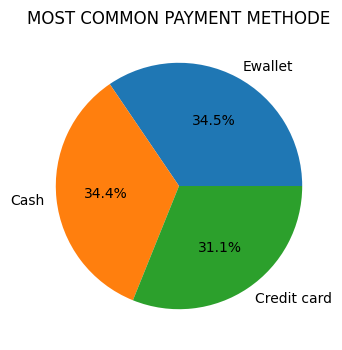

In [7]:
common_payment_method=df['Payment'].value_counts()
print(common_payment_method)
plt.figure(figsize=(5,4))
plt.pie(common_payment_method,autopct='%1.1f%%',labels=common_payment_method.index)
plt.ylabel('')
plt.title('MOST COMMON PAYMENT METHODE')
plt.show()

#### *Most Common Payment Method: A significant percentage of customers prefer a Ewallet payment method.*

### 4.How does the total sales amount vary by customer type (e.g., Member vs. Normal)?

Member


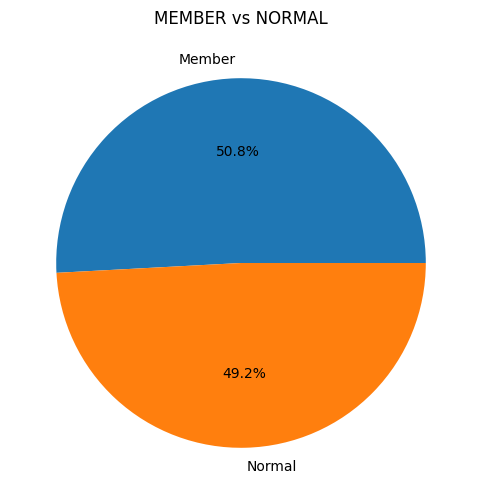

In [8]:
total_sales_by_customer=df.groupby('Customer type')['Total'].sum()
print(total_sales_by_customer.idxmax())
plt.figure(figsize=(8,6))
plt.pie(total_sales_by_customer,autopct="%1.1f%%",labels=total_sales_by_customer.index)
plt.legend
plt.title('MEMBER vs NORMAL')
plt.show()


#### *Customer Type Sales: Members customers contribute More Slightly to overall sales.*

### 5.What are the peak hours for transactions?

C:\Users\Ketan\AppData\Local\Temp\ipykernel_8208\3261706957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour']=pd.to_datetime(df['Time']).dt.hour


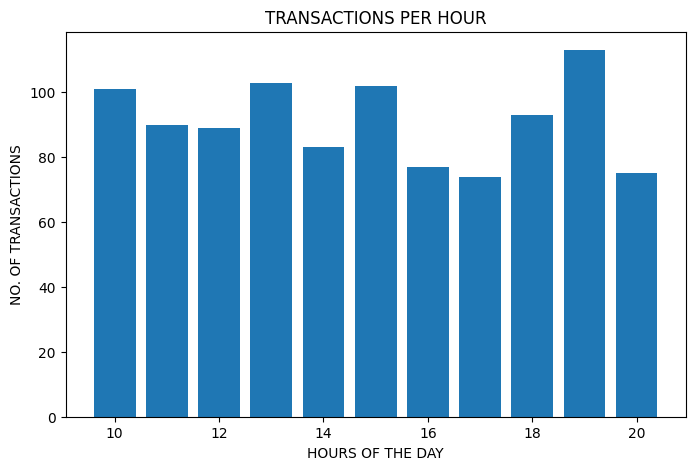

Peak sales Hour = 19:00


In [9]:
df['Hour']=pd.to_datetime(df['Time']).dt.hour
transaction_per_hour=df['Hour'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(transaction_per_hour.index,transaction_per_hour.values)
plt.xlabel("HOURS OF THE DAY")
plt.ylabel("NO. OF TRANSACTIONS")
plt.title("TRANSACTIONS PER HOUR")
plt.show()

peak_hour=transaction_per_hour.idxmax()
print(f"Peak sales Hour = {peak_hour}:00")

#### *Peak Hours for Transactions: The busiest hour for transactions is 19:00 (7 PM).*

# **Statistical Analysis**

### 6.What is the average sales amount per transaction?

In [10]:
avg_sales=df['Total'].mean()
print(avg_sales)

322.966749


#### *Customers, on average, spend ₹323 per transaction, which helps in setting pricing strategies and promotions.*

### 7.Is there a correlation between unit price and quantity sold?

In [11]:
corr_unit_qty=df['Unit price'].corr(df['Quantity'])
corr_unit_qty

np.float64(0.01077756434249728)

#### *The price of a product does not significantly impact the number of units sold. Other factors like promotions, customer preferences, and demand may play a bigger role.*

### 8.What is the distribution of customer ratings, and what insights can be drawn from it?

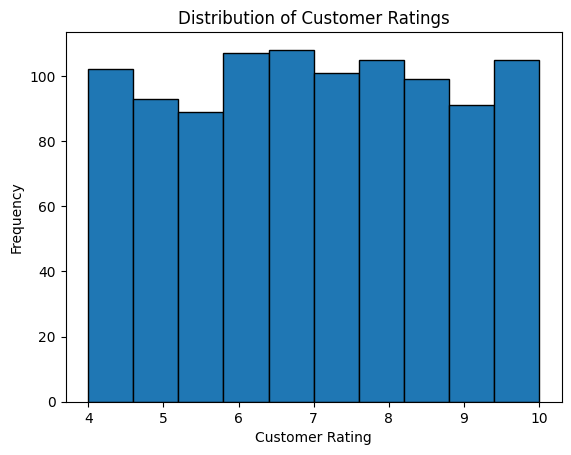

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [33]:
customer_ratings_dist=df['Rating']
plt.hist(customer_ratings_dist,bins=10,edgecolor='black')
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ratings")
plt.show()

rating_summary = df["Rating"].describe()
rating_summary

#### *The average rating is 6.97, with a standard deviation of 1.72.The supermarket can analyze low ratings to improve customer satisfaction and service.*

### 9.How does the discount percentage affect total sales?

In [13]:
df['Estimated discount %'] = ((df['cogs'] - (df['Unit price'] * df['Quantity'])) / df['cogs']) * 100
discount_sales_corr=df['Estimated discount %'].corr(df['Total'])
discount_sales_corr

np.float64(-0.02227069532386835)

#### *Discounts do not significantly impact total sales in this dataset.*

#### *The correlation is almost zero, meaning customers do not necessarily buy more when discounts are applied.*

#### *Other factors like product demand, customer preferences, and promotions might influence sales more than discounts.*

### 10.Are weekend sales significantly different from weekday sales

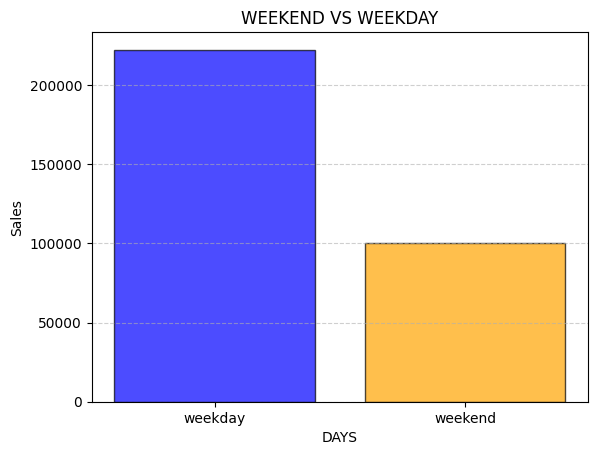

In [39]:

df['Date']=pd.to_datetime(df['Date'])
df['day of week']=df['Date'].dt.dayofweek
df['weekend']=df['day of week'].apply(lambda x: "weekend" if x >= 5 else "weekday" )
weekday_vs_weekend = df.groupby('weekend')['Total'].sum()
plt.bar(weekday_vs_weekend.index,weekday_vs_weekend.values, color=["blue","orange"],edgecolor='black',alpha=0.7)
plt.xlabel('DAYS')
plt.ylabel('Sales')
plt.title('WEEKEND VS WEEKDAY')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### *Sales on weekdays are more than double those on weekends.*

#### *This suggests that most customers prefer shopping on weekdays rather than weekends.*